In this assessment, you'll continue working with the houseprices data. To complete this assessment, at the end of this assessment submit a link to a Jupyter Notebook containing your solutions to the following tasks:

* Load the houseprices data from Thinkful's database.
* Reimplement your model from the previous lesson.
* Try OLS, lasso, ridge, and elastic net regression using the same model specification. This time, you need to do k-fold cross-validation to choose the best hyperparameter values for your models. Scikit-learn has RidgeCV, LassoCV, and ElasticNetCV that you can utilize to do this. Which model is the best? Why?

###  Load the houseprices data from Thinkful's database.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action = 'ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices',con=engine)

# No need for an open connection, because you're only doing a single query.
engine.dispose()

house_df.info()
house_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


### Reimplement your model from the previous lesson.

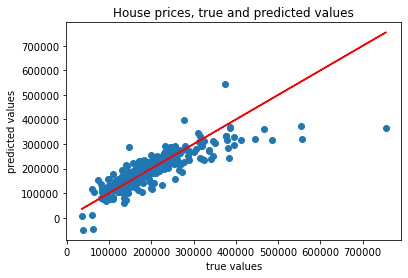

The number of observations in the training set: 1095
The number of observations in the test set: 365


In [2]:
house_df['mssubclass_overallqual'] = house_df.mssubclass * house_df.overallqual
house_df['lotarea_overallqual'] = house_df.lotarea * house_df.overallqual

Y = house_df['saleprice']
X = house_df[['overallqual', 'garagecars', 'yearremodadd', 'lotarea_overallqual', 'mssubclass', 'mssubclass_overallqual']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 22)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

lrm = LinearRegression()
lrm.fit(X_train, y_train)

y_preds = lrm.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = 'red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('House prices, true and predicted values')
plt.show()

results = sm.OLS(y_train, X_train).fit()
# print(results.summary())

print("The number of observations in the training set: {}".format(X_train.shape[0]))
print("The number of observations in the test set: {}".format(X_test.shape[0]))

### Try OLS, lasso, ridge, and elastic net regression using the same model specification. This time, you need to do k-fold cross-validation to choose the best hyperparameter values for your models. Scikit-learn has RidgeCV, LassoCV, and ElasticNetCV that you can utilize to do this. Which model is the best? Why?

In [4]:
print("-----OLS-----")
print("R-squred of the model in the training set: {}".format(lrm.score(X_train, y_train)))
print("R-squared of the model in the test set: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction: {}".format(np.mean(np.abs((y_test - y_preds)/y_test))*100))

lassoregr = LassoCV()
lassoregr.fit(X_train, y_train)
y_preds_lasso = lassoregr.predict(X_test)

print("-----Lasso-----")
print("R-squared of the model on the training set: {}".format(lassoregr.score(X_train, y_train)))
print("R-squared of the model on the test set: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction: {}".format(mean_absolute_error(y_test, y_preds_lasso)))
print("Mean squared error of the prediction: {}".format(mse(y_test, y_preds_lasso)))
print("Root mean squared error of the prediction: {}".format(rmse(y_test, y_preds_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_lasso) / y_test)) *100))

ridgeregr = RidgeCV()
ridgeregr.fit(X_train, y_train)
y_preds_ridge = ridgeregr.predict(X_test)

print("-----Ridge-----")
print("R-squared of the model on the training set: {}".format(ridgeregr.score(X_train, y_train)))
print("R-squared of the model on the test set: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction: {}".format(mean_absolute_error(y_test, y_preds_ridge)))
print("Mean squared error of the prediction: {}".format(mse(y_test, y_preds_ridge)))
print("Root mean squared error of the prediction: {}".format(rmse(y_test, y_preds_ridge)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_ridge) / y_test)) *100))

elasticregr = ElasticNetCV()
elasticregr.fit(X_train, y_train)
y_preds_elastic = elasticregr.predict(X_test)

print("-----Elastic Net-----")
print("R-squared of the model on the training set: {}".format(elasticregr.score(X_train, y_train)))
print("R-squared of the model on the test set: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction: {}".format(mean_absolute_error(y_test, y_preds_elastic)))
print("Mean squared error of the prediction: {}".format(mse(y_test, y_preds_elastic)))
print("Root mean squared error of the prediction: {}".format(rmse(y_test, y_preds_elastic)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_elastic) / y_test)) *100))


-----OLS-----
R-squred of the model in the training set: 0.7094584762790888
R-squared of the model in the test set: 0.7001091407468635
Mean absolute error of the prediction: 29727.582985410074
Mean squared error of the prediction: 2146376075.4848988
Root mean squared error of the prediction: 46328.99821369872
Mean absolute percentage error of the prediction: 17.057683503679467
-----Lasso-----
R-squared of the model on the training set: 0.24625710166776849
R-squared of the model on the test set: -0.012309025825176345
Mean absolute error of the prediction: 51038.921758648
Mean squared error of the prediction: 7245288767.519705
Root mean squared error of the prediction: 85119.26202405484
Mean absolute percentage error of the prediction is: 28.843382902485537
-----Ridge-----
R-squared of the model on the training set: 0.7092752230353779
R-squared of the model on the test set: 0.6969799022424867
Mean absolute error of the prediction: 29802.841832788898
Mean squared error of the prediction: 

Based on the values calculated, OLS model fits the best. The R-squared and adjusted R-squared is high, and the rest of the values are the lowest.